In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def pandemic(k,t):
    
    S_H = k[0]
    S_M = k[1]
    S_L = k[2]
    I_H = k[3]
    I_M = k[4]
    I_L = k[5]  
    
    dS_Hdt = -ps['beta_H'] * (ps['alpha'] * I_H + I_M + I_L) * S_H +  ps['eta_MH'] * S_M
    dS_Mdt = -ps['beta_M'] * (I_H + ps['alpha'] * I_M + I_L) * S_M - (ps['eta_MH'] + ps['eta_ML']) * S_M
    dS_Ldt = -ps['beta_L'] * (I_H + I_M + ps['alpha'] * I_L) * S_L +  ps['eta_ML'] * S_M
    
    dI_Hdt =  ps['beta_H'] * (ps['alpha'] * I_H + I_M + I_L) * S_H - ps['gamma_H'] * I_H 
    dI_Mdt =  ps['beta_M'] * (I_H + ps['alpha'] * I_M + I_L) * S_M - ps['gamma_M'] * I_M 
    dI_Ldt =  ps['beta_L'] * (I_H + I_M + ps['alpha'] * I_L) * S_L - ps['gamma_L'] * I_L 
    
    return [dS_Hdt, dS_Mdt, dS_Ldt, dI_Hdt, dI_Mdt, dI_Ldt]

In [4]:
#t range and time step
stp = 0.1
t = np.arange(0,100, stp)

In [5]:
#groups
S_colors = ['r-','y-','g-']
I_colors = ['r--','y--','g--'] 
groups = ['high risk', 'medium risk', 'low risk']

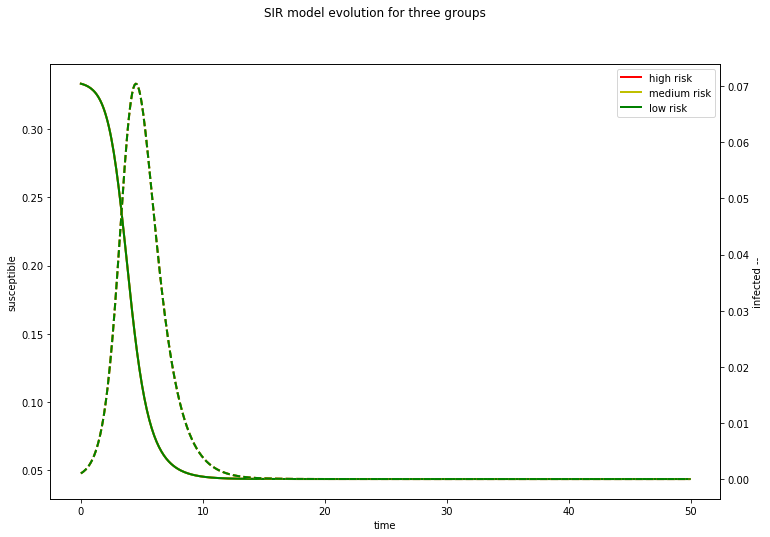

In [6]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 1,  'beta_M' : 1 ,'beta_L' : 1,       #Infection rate
      'gamma_H' : 1, 'gamma_M' : 1 ,'gamma_L' : 1,      # death and recovery rate
      'alpha'   : 5,                                    #isolation parameter
      'eta_MH'  : 0, 'eta_ML' : 0}                      #interchage rate

#Solving initial conditions
t = np.arange(0,50, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

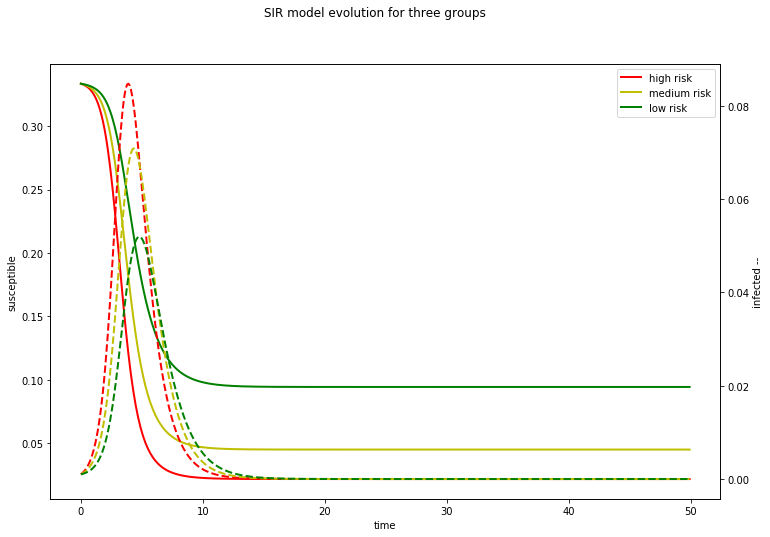

In [22]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 1.3,  'beta_M' : 1 ,'beta_L' : 0.7,       #Infection rate
      'gamma_H' : 1, 'gamma_M' : 1 ,'gamma_L' : 1,      # death and recovery rate
      'alpha'   : 5,                                    #isolation parameter
      'eta_MH'  : 0, 'eta_ML' : 0}                      #interchage rate

#Solving initial conditions
t = np.arange(0,50, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

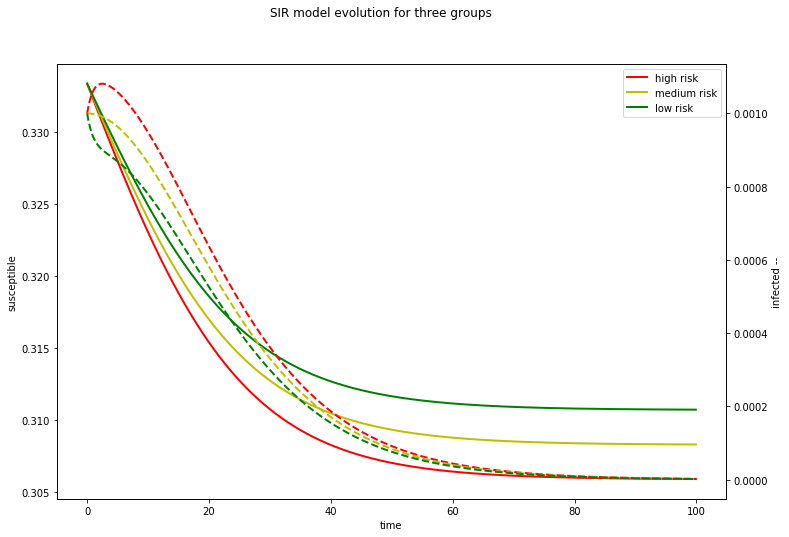

In [9]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 1.1,  'beta_M' : 1 ,'beta_L' : 0.9,       #Infection rate
      'gamma_H' : 1, 'gamma_M' : 1 ,'gamma_L' : 1,      # death and recovery rate
      'alpha'   : 1,                                    #isolation parameter
      'eta_MH'  : 0, 'eta_ML' : 0}                      #interchage rate

#Solving initial conditions
t = np.arange(0,100, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

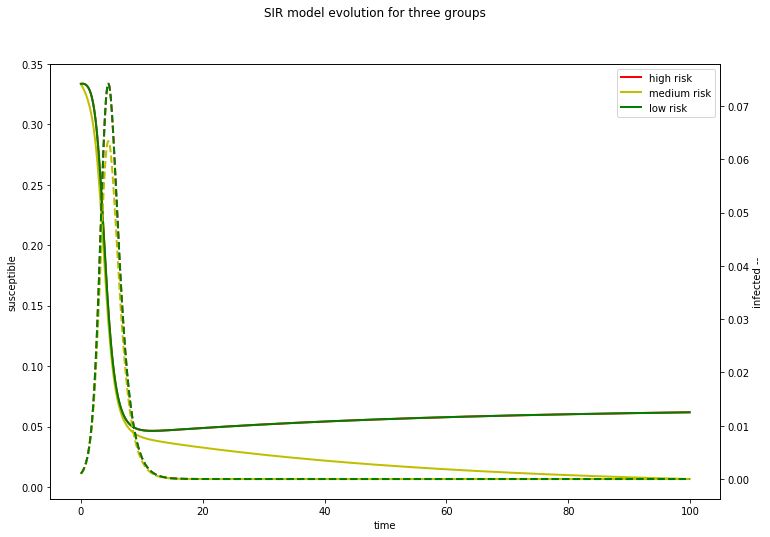

In [10]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 1,  'beta_M' : 1 ,'beta_L' : 1,       #Infection rate
      'gamma_H' : 1, 'gamma_M' : 1 ,'gamma_L' : 1,      # death and recovery rate
      'alpha'   : 5,                                    #isolation parameter
      'eta_MH'  : 0.01, 'eta_ML' : 0.01}                      #interchage rate

#Solving initial conditions
t = np.arange(0,100, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

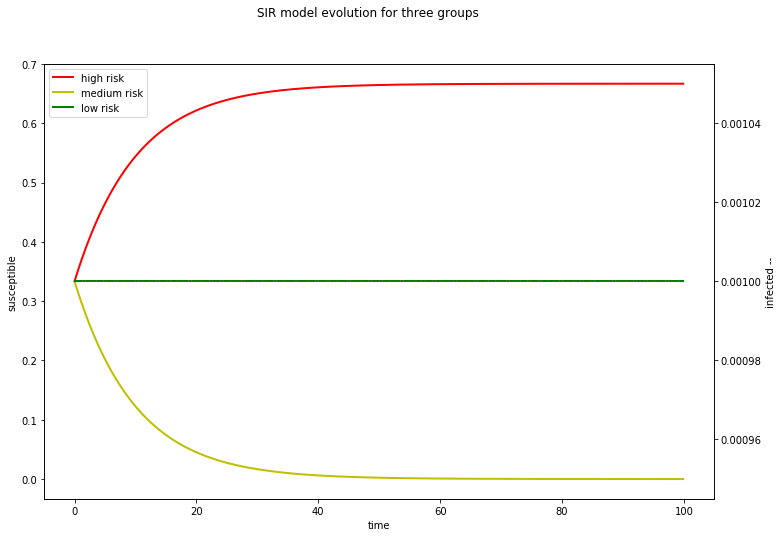

In [15]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 0,  'beta_M' : 0 ,'beta_L' : 0,       #Infection rate
      'gamma_H' : 0, 'gamma_M' : 0 ,'gamma_L' : 0,      # death and recovery rate
      'alpha'   : 5,                                    #isolation parameter
      'eta_MH'  : 0.1, 'eta_ML' : 0.0}                      #interchage rate

#Solving initial conditions
t = np.arange(0,100, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()

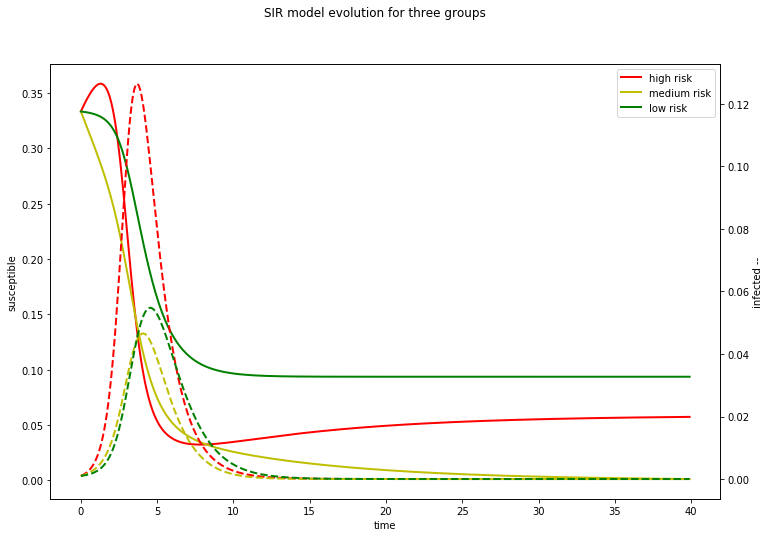

In [21]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 
k0 = [1/3, 1/3, 1/3, 0.001, 0.001, 0.001]               #[high, med, low]         
ps = {'beta_H'  : 1.3,  'beta_M' : 1 ,'beta_L' : 0.7,       #Infection rate
      'gamma_H' : 1, 'gamma_M' : 1 ,'gamma_L' : 1,      # death and recovery rate
      'alpha'   : 5,                                    #isolation parameter
      'eta_MH'  : 0.1, 'eta_ML' : 0.00}                      #interchage rate

#Solving initial conditions
t = np.arange(0,40, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:]

#plotting
for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
ax.legend()